In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from collections import Counter
from scipy import stats
import numpy as np
import plotly
# set style
plt.style.use('ggplot')
plt.style.use('seaborn-pastel')

In [226]:
docs=json.load(open("data/docs.json","rb"))
entities=json.load(open("data/entities_meta.json","rb"))


In [227]:
docs=pd.DataFrame(docs)
print(entities.keys())

dict_keys(['people', 'organizations', 'locations'])


## Goal:
The goal of this project is to create an “overview” of the most important information in our dataset. A reader should be able to get up to speed on the major events that occurred in about 5 minutes or less.
 
## Questions
Part of the fun of being a Product Engineer is that we often have to solve problems with a varied level of initial definition. In general there are 3 broad buckets:
Clearly defined need and feature definition
Clearly defined need by loose product definition
No defined need, but feeling like something more is needed
 
We hope to give you the ability to experience a little bit of each of these in the next three questions


## Question 1)
Given the list documents, create a time-series of document volume for wildfires for the time span of the query.

In [228]:
docs.head()

,event_id,content,title,date,sources,people,organizations,locations,id,summary
0,4a68a737-a357-47ea-a4b9-afe4f3c1f460,"FLAGSTAFF, Ariz. -- An excavator used to clea...",Spark from wildfire-prevention efforts likely ...,2019-09-13T18:17:35Z,[ABC7NY],"[8e7aff20-4281-5023-8407-f43e5ba289e4, 4fc245e...",[9d4d391e-a27d-4b76-a783-7ce20c9160a0],"[28152159-6443-50c6-864c-f6e9920c9232, 15f3e2e...",7ac25cda-aec2-5af1-a937-4fee15ea35ba,The excavator was working on steep slopes near...
1,3b4e3874-2034-4cc7-9929-09d60f1092e7,“Wildfire raging through the Paradise region i...,Conditions of the California wildfire reflect ...,2018-11-16T12:53:23Z,[ShowMe Plettenberg Bay],"[0aa3184c-c835-5afa-a5e7-656c37a08a7b, 193958f...",[153dc210-6604-4db6-b374-d9167690f2cf],"[dfbf9ad3-9e72-5ba9-99ac-fd32ca480ac1, 2ac73e0...",b04dba07-ffc0-5a49-be3b-6eaaf57150e2,"""Wildfire raging through the Paradise region i..."
2,d3c463cc-0b2f-4e51-9f99-f2f6cfc90d0f,Montanans were fortunate this year’s wildfire ...,"Hazardous homes increasing wildfire risks, costs",2018-09-27T19:14:34Z,[Bozeman Daily Chronicle],[a9637d0a-7c6a-5eeb-8f5c-947d3fea81bd],[81029b9e-056b-4213-8595-f53c7555d4ae],"[1709e49c-551f-5a2d-87a2-d84942ac24a0, 7534d4a...",71e746b0-9de5-5602-a7ca-deceb760ab83,"In Gallatin County there are 3,848 homes in ar..."
3,0d357eaa-cf9c-406b-a551-503832c6dd5b,1 Introduction \nLarge wildfires are increasi...,"Resilience to Large, “Catastrophic” Wildfires ...",2020-07-09T12:13:46Z,[Earth's Future],"[6eac2fd9-b19b-5a66-b2a0-cfba00919fc9, 8cdbbf2...","[5eb2f096-ed8a-4aa9-9f8d-e2bdb45cd7da, 6a97278...","[7b656f8b-97f4-5ca3-b533-2d9030312b44, 04557f0...",4d73f52b-d24d-5314-952e-5d42272c470b,"First, we expect that vegetation functional gr..."
4,f0365861-6f2f-42bc-a0ef-35d2c5e52d00,Discussing wildfire protection and management ...,"Rod Rose, Bushfire Management Expert",2020-04-28T16:01:45Z,[CSR Wire],[d18aeb90-b77f-5f80-aaa9-98058b97d922],"[8f808d10-96da-41fa-a477-62802c44b98f, fb58c4b...","[4fbe630c-4a31-5847-a4c0-333ad0fb9072, 7b656f8...",05c861d4-887a-544e-a309-ae9fe36e4366,Rod won the Fire Protection Association of Aus...


In [229]:
locations={x["id"]:x for x in entities["locations"]}
organizations={x["id"]:x for x in entities["organizations"]}
people={x["id"]:x for x in entities["people"]}

entities={"locations":(locations, "name"),
         "organizations":(organizations,"display_organization"),
         "people":(people,"display_person")}

In [230]:
# Explore number of missing values

print(docs.isnull().sum())

event_id           0
content            0
title              0
date               0
sources            0
people             0
organizations      0
locations          0
id                 0
summary          107
dtype: int64


## Preprocessing

In [232]:
# Convert date to pd.TimeStamp
docs["date"]=pd.to_datetime(pd.to_datetime(docs["date"]).apply(lambda x: x.date()))

Text(0.5, 1.0, 'Time-series of document volume for wildfires')

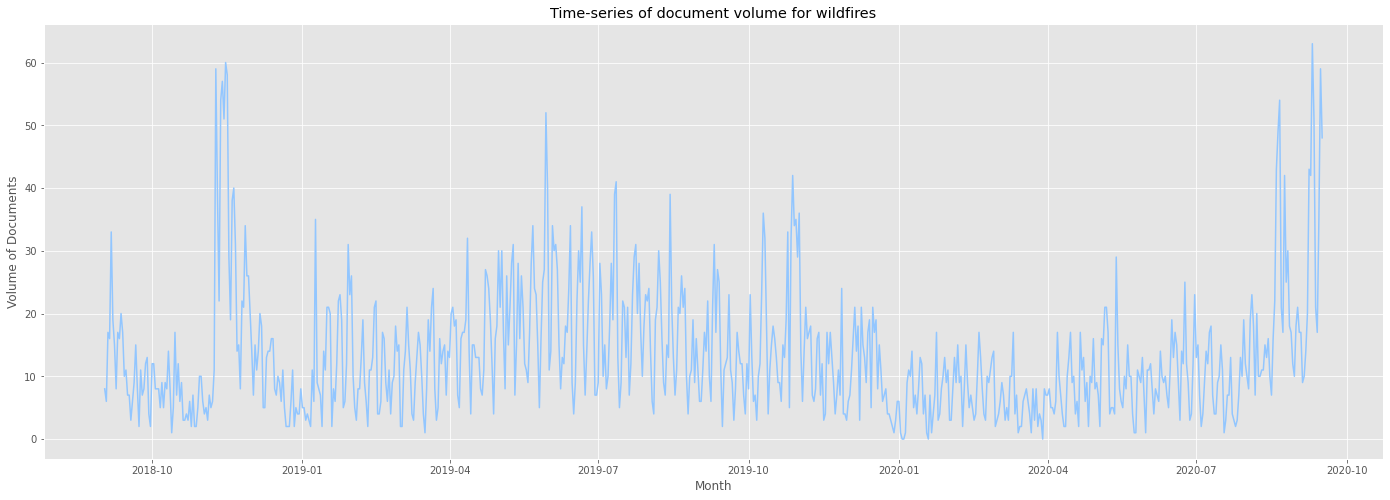

In [233]:
## Time Series of volume of documents
document_count=docs.groupby(pd.Grouper(key="date", freq="d")).count()["id"].iloc[1:-1]
fig=plt.figure(figsize=(24,8))
plt.plot(document_count)
plt.ylabel("Volume of Documents")
plt.xlabel("Month")
plt.title("Time-series of document volume for wildfires")

## Question 2)
The time-series from Question 1 shows that there is always some coverage of wildfires, but the volume varies throughout the year, peaking at certain points. We’d like to highlight the important news that happened at those peaks. Develop an algorithm or heuristic to pick the events that happen at the peaks. Remember, the goal of this Overview page is to give someone a 5 minute catch up on the history that led us to today, so we want to limit the amount of information we display to just the most important. Decide how you would like to present the events.
At Primer, we productionize tools to discover insight from data. Make sure your code would be easily understandable to your co-workers.

In [234]:
from sklearn import preprocessing
def peak_detection(x, window=40):
    scaler=preprocessing.StandardScaler()
    moving_average=((x.rolling(window=window+1, center=True).mean()-x/(window+1))*(window+1)/window)
    #moving_average=x.rolling(window=window+1, center=True).mean()
    sd=x.rolling(window=window+1, center=True).std()
    score=(x-moving_average)/sd
    index=score.dropna().index
    return pd.Series(scaler.fit_transform(score.dropna().values.reshape(-1,1)).reshape(-1,), index=index)
    #return score.dropna()


In [235]:
peaks=peak_detection(document_count, window=120)

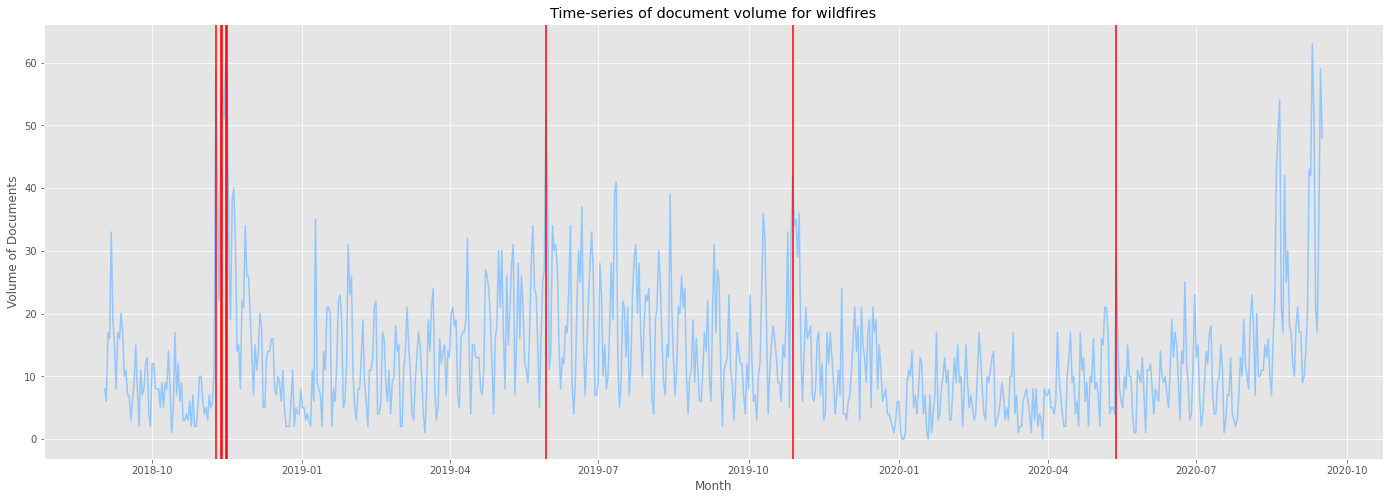

In [236]:
fig=plt.figure(figsize=(24,8))
plt.plot(document_count)
plt.ylabel("Volume of Documents")
plt.xlabel("Month")
plt.title("Time-series of document volume for wildfires")
for ind in peaks[peaks>3].index:
    plt.axvline(ind, color="red")

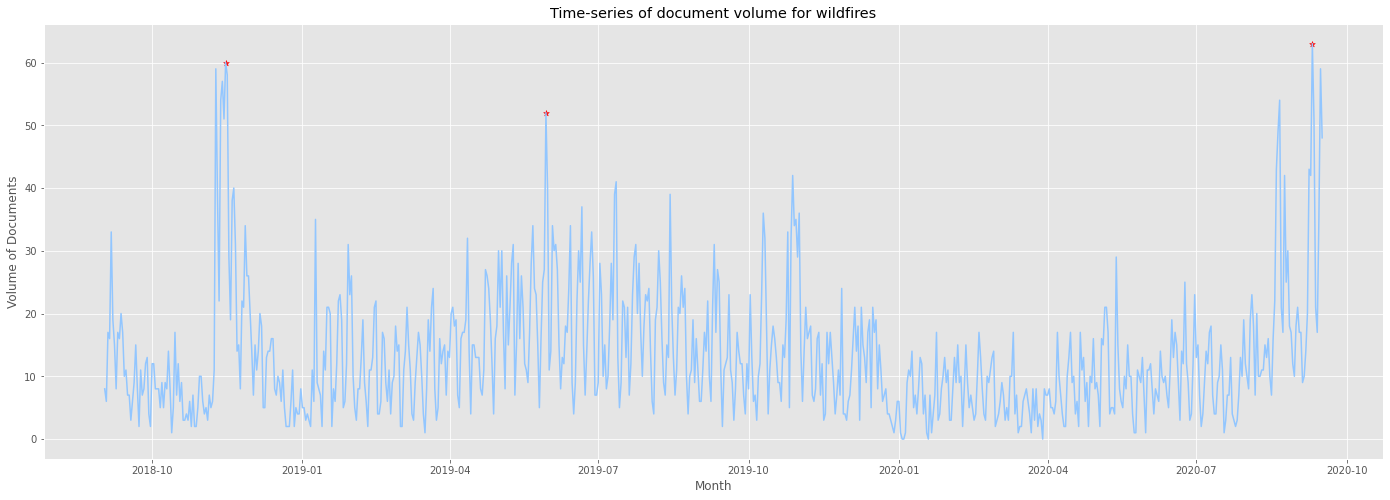

In [237]:
from scipy.signal import argrelextrema, find_peaks, find_peaks_cwt
peaks=find_peaks_cwt(document_count, np.arange(1, 60), max_distances=np.arange(1, 60)*2)
peaks=argrelextrema(document_count.values,comparator=np.greater,order=180)#, mode="wrap")

#peaks=find_peaks(document_count.values, width=5)[0]


fig=plt.figure(figsize=(24,8))
plt.plot(document_count)
plt.ylabel("Volume of Documents")
plt.xlabel("Month")
plt.title("Time-series of document volume for wildfires")
plt.scatter(document_count.iloc[peaks].index, document_count.iloc[peaks], color="red", marker="*")

In [216]:
from scipy.signal import argrelextrema
class Wildfire_News:
    def __init__(self, data):
        self.data=data
        
    def preprocessing(self):
        # Convert date to pd.TimeStamp
        self.data["date"]=pd.to_datetime(self.data["date"])
        
    def document_count(self, freq="d"):
        return self.data.groupby(pd.Grouper(key="date", freq=freq)).count()["id"]
    
    def document_count_plot(self, document_count):    
        fig=plt.figure(figsize=(24,8))
        plt.plot(document_count)
        plt.ylabel("Volume of Documents")
        plt.xlabel("Month")
        plt.title("Time-series of document volume for wildfires")
        plt.legend()
        
    def find_peaks(self, document_count,freq="d",order=180, plot=True):
        peaks=argrelextrema(document_count.values,comparator=np.greater,order=order)
        peaks=document_count.iloc[peaks]
        if plot:
            self.document_count_plot(document_count)
            plt.scatter(peaks.index, peaks, color="red", marker="*", label="Peaks")
        return peaks
    

No handles with labels found to put in legend.


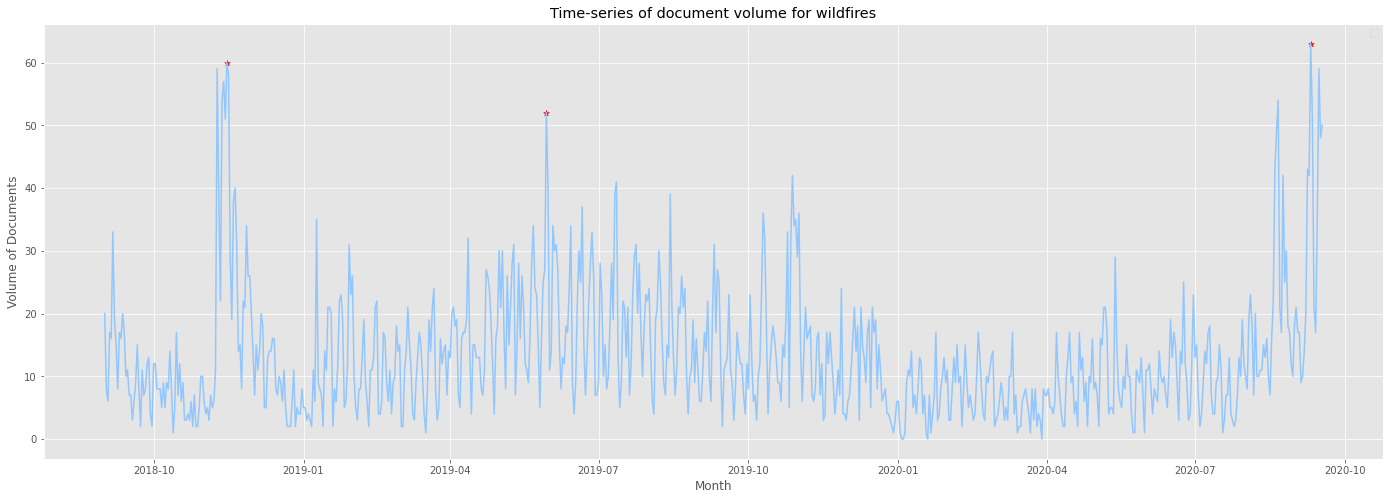

In [217]:
# define class
news_class=Wildfire_News(docs)

# get time series of document_count
document_count=news_class.document_count()

# find_peaks
peaks=news_class.find_peaks(document_count)


In [224]:
docs["date"].iloc[0].date()

datetime.date(2019, 9, 13)

In [222]:
docs.loc[docs["date"]==peaks.index[0].date()]

,event_id,content,title,date,sources,people,organizations,locations,id,summary


In [219]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import nltk
#import gensim
from gensim import corpora
import nltk
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub('\"', "", sent) 
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        return sent
        
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    return [lemmatize.lemmatize(w, get_wordnet_pos(w)) for w in two.split() if w not in string.punctuation]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matiasb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matiasb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sent_to_words()

In [113]:
def peak_detection(time_series):
    """
    input:
        times_series: pd.Series, times series containing weekly document volumes
    return:
        list of TimeStamp representing the end date of peak weeks and upper bound
    """
    
    # Take the log of the series
    log_count=np.log(document_count+1)
    # get mean and standart_deviation
    mean, sigma = np.mean(log_count), np.std(log_count)
    # get lower and upper bounds for 95% CI
    lower_bound, upper_bound=stats.norm.interval(0.95, loc=mean, scale=sigma)
    return time_series[time_series>np.exp(upper_bound)].index.tolist(), np.exp(upper_bound)

def query_dates(dates, week_peak):
    start_ = week_peak - datetime.timedelta(days=7)
    return (dates>=start_)&(dates<week_peak)


def documents_to_entities(series_entities, dict_entities, key_string, k=10):
    result=[]
    series_entities.apply(lambda x: result.extend(x))
    return {dict_entities[key][key_string]:value for key,value in Counter(result).most_common(k)}

In [114]:
peaks, upper_bound=peak_detection(document_count)

Text(0.5, 1.0, 'Time-series of document volume for wildfires')

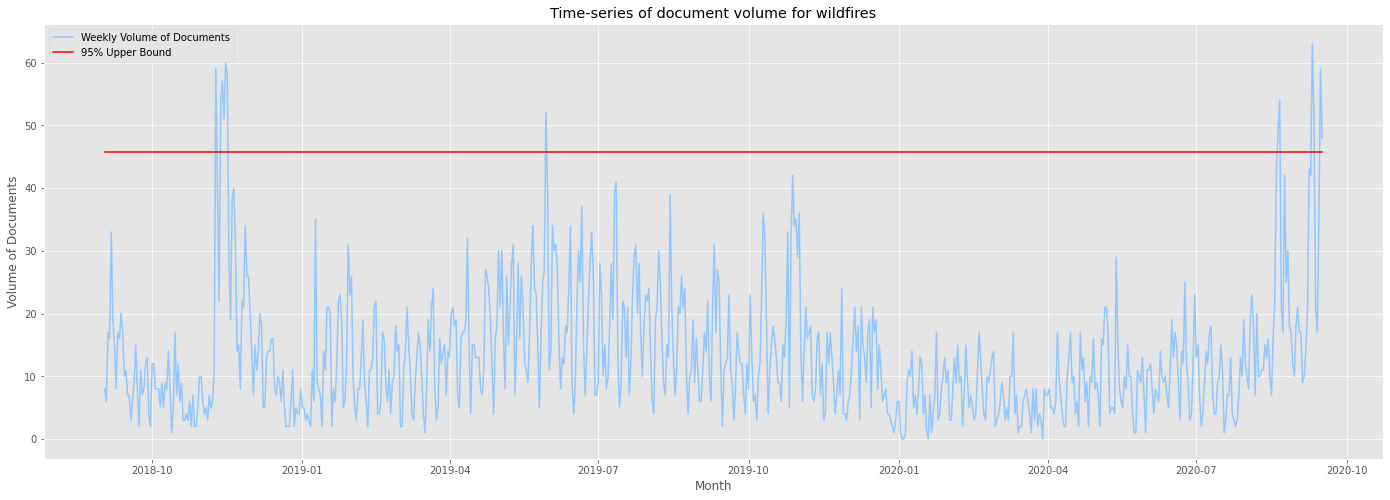

In [115]:
fig=plt.figure(figsize=(24,8))
plt.plot(document_count, label="Weekly Volume of Documents")
plt.plot(pd.Series([upper_bound]*len(document_count), index=document_count.index), color="red", label="95% Upper Bound")
plt.legend()
plt.ylabel("Volume of Documents")
plt.xlabel("Month")
plt.title("Time-series of document volume for wildfires")

(array([  4.,  13.,  29.,  78.,  64., 209., 171., 109.,  51.,  18.]),
 array([0.        , 0.41588831, 0.83177662, 1.24766493, 1.66355323,
        2.07944154, 2.49532985, 2.91121816, 3.32710647, 3.74299478,
        4.15888308]),
 <BarContainer object of 10 artists>)

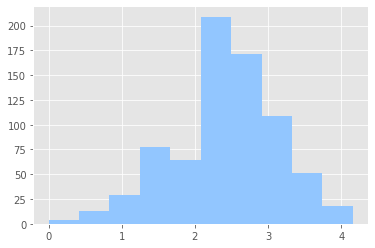

In [122]:
plt.hist(np.log(document_count+1))

In [15]:
def describe_entities(data, entities, peak_series, k=7):
    fig, axs = plt.subplots(1,3,figsize=(26,14))
    peak_data=data.loc[peak_series]
    width = 0.3
    for i, (entity_name, (entity_map, key_name))in enumerate(entities.items()):
        most_common_data=pd.Series(documents_to_entities(data[entity_name], entity_map, key_name, k=len(entity_map)))
        most_common_peak=pd.Series(documents_to_entities(peak_data[entity_name], entity_map, key_name, k=k))
        (most_common_peak/len(peak_data)*100).plot(kind="bar", ax=axs.flat[i], color="blue", width=width, label="Peak", position=0)
        (most_common_data[most_common_peak.index]/len(data)*100).plot(kind="bar", ax=axs.flat[i], color="red",width=width, label="Entire Dataset", position=1)
        axs.flat[i].legend()
        axs.flat[i].set_title(entity_name)
    plt.legend()
    plt.show()

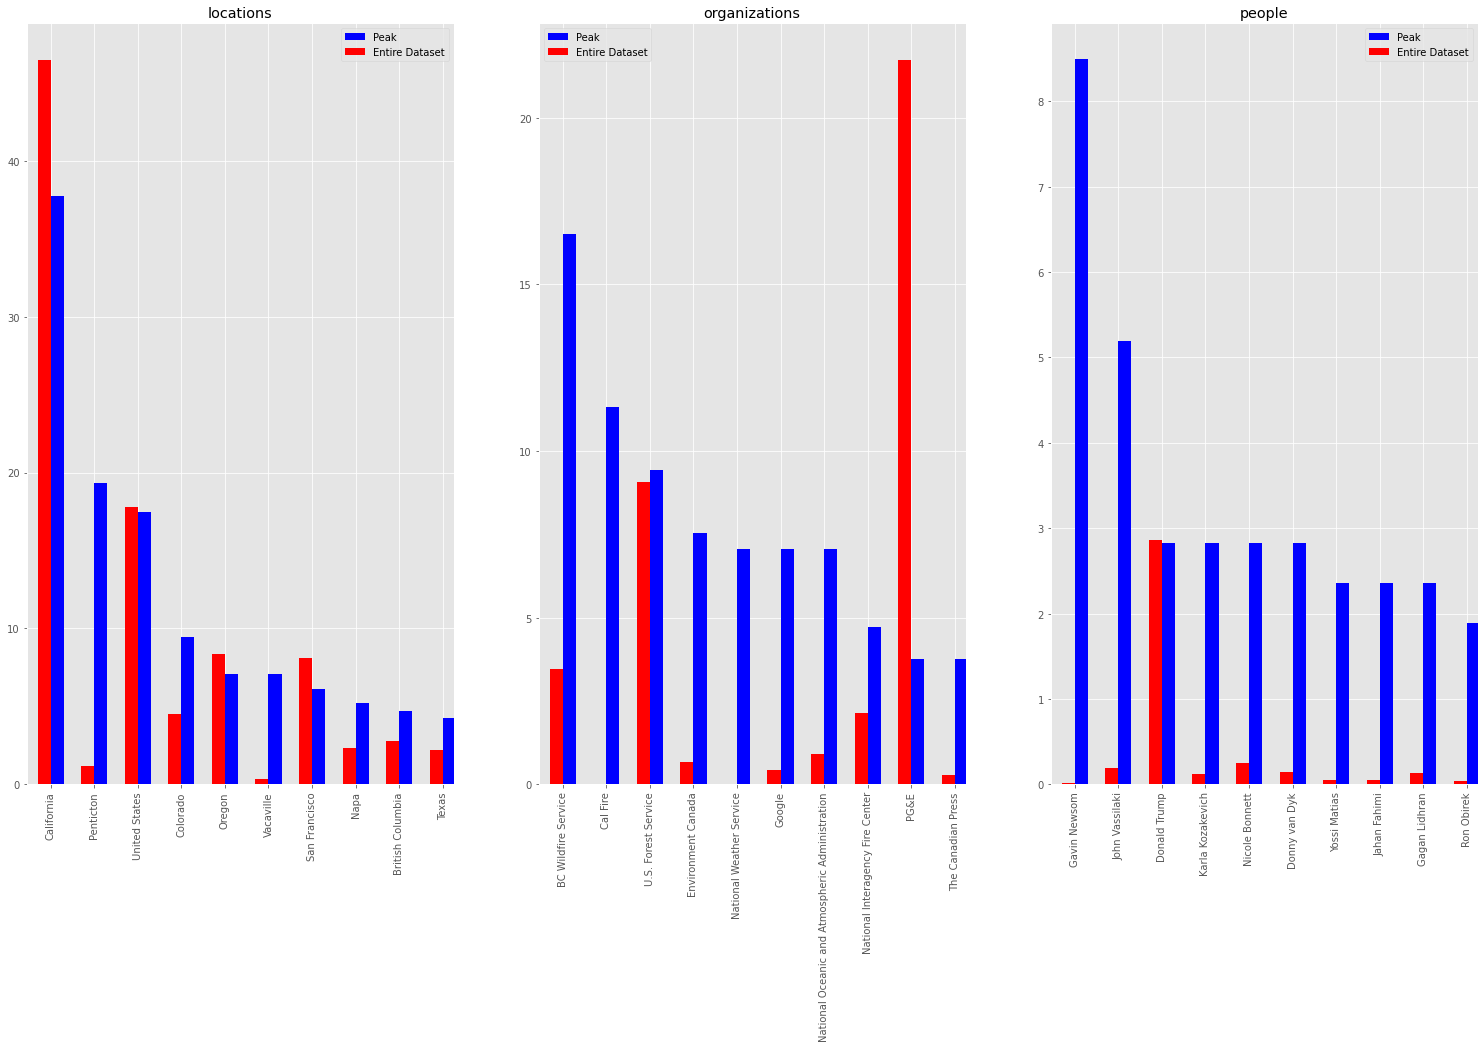

In [16]:
describe_entities(docs, entities, query_dates(docs["date"],peaks[1]), k=10)

In [17]:
w=documents_to_entities(docs["locations"], entities["locations"][0], "id", k=500)

In [18]:
points=[]
for key, value in w.items():
    lat=entities["locations"][0][key]["latitude"]
    long=entities["locations"][0][key]["longitude"]
    if np.isnan(lat):
        continue
    points.append([lat,long, value])

In [19]:
geo=pd.DataFrame(points, columns=["latitude","longitude","count"])

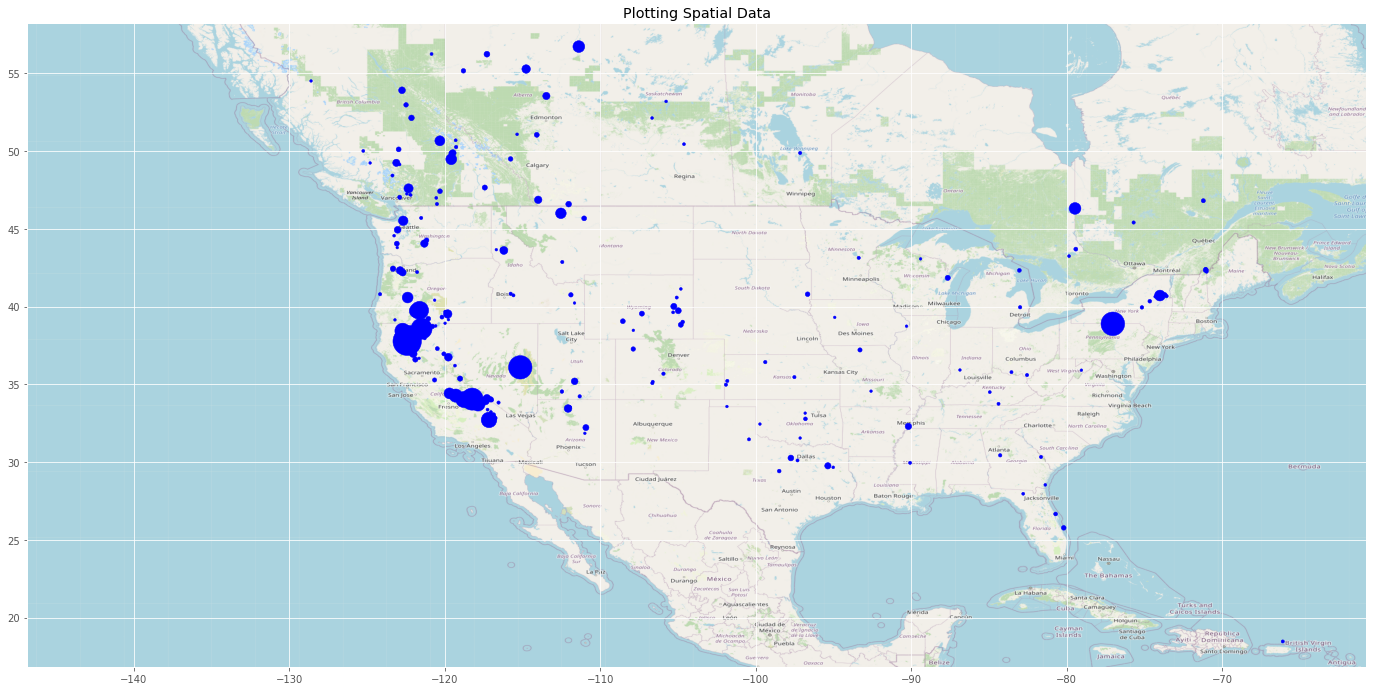

In [20]:
BBox = ((-146.876,  -60.743,      
         16.836, 58.211))

ruh_m = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (24,24))
ax.scatter(geo.longitude, geo.latitude, zorder=1, alpha= 1.0, c='b', s=geo["count"],cmap=plt.get_cmap("jet"),label="Number of documents")
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

## Topic Modeling

In [21]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import nltk
#import gensim
from gensim import corpora
import nltk
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)
        sent = re.sub('\"', "", sent) 
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 
        
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    return [lemmatize.lemmatize(w, get_wordnet_pos(w)) for w in two.split() if w not in string.punctuation]
    #return [lemmatize.lemmatize(i) for i in two.split()]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matiasb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/matiasb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
docs["content"].iloc[0]

'FLAGSTAFF, Ariz.  -- An excavator used to clear out parts of a northern Arizona forest to help prevent wildfires struck a rock, likely sparking a blaze that forced the evacuation of two dozen homes this summer, authorities  Thursday. \nThe excavator was working on steep slopes near Flagstaff in late July when it hit a rock, creating a heat source that stayed underground for more than half a day, the Coconino National Forest said. Warm and windy conditions transformed it into a small fire the next morning that burned for three weeks. \n\n\nEquipment used by the Oregon-based contractor was in good, working order and had been inspected properly, authorities said. The operator also stayed on site the required hour after shutting down to check the area. \n"There is a risk in anything that we do in the forest, and we can never eliminate that entirely," said Paul Summerfelt, who oversees the Flagstaff Watershed Protection Project on the Coconino National Forest. "This was an extremely unfort

In [20]:
cleaning(docs["content"].iloc[0])

['flagstaff',
 'ariz',
 'excavator',
 'use',
 'clear',
 'part',
 'northern',
 'arizona',
 'forest',
 'help',
 'prevent',
 'wildfire',
 'struck',
 'rock',
 'likely',
 'spark',
 'blaze',
 'force',
 'evacuation',
 'two',
 'dozen',
 'home',
 'summer',
 'authority',
 'thursday',
 'excavator',
 'work',
 'steep',
 'slope',
 'near',
 'flagstaff',
 'late',
 'july',
 'hit',
 'rock',
 'create',
 'heat',
 'source',
 'stayed',
 'underground',
 'half',
 'day',
 'coconino',
 'national',
 'forest',
 'say',
 'warm',
 'windy',
 'condition',
 'transform',
 'small',
 'fire',
 'next',
 'morning',
 'burn',
 'three',
 'week',
 'equipment',
 'use',
 'oregonbased',
 'contractor',
 'good',
 'work',
 'order',
 'inspect',
 'properly',
 'authority',
 'say',
 'operator',
 'also',
 'stayed',
 'site',
 'require',
 'hour',
 'shut',
 'check',
 'area',
 'there',
 'risk',
 'anything',
 'forest',
 'never',
 'eliminate',
 'entirely',
 'say',
 'paul',
 'summerfelt',
 'oversees',
 'flagstaff',
 'watershed',
 'protection',
 '

In [21]:
from gensim.utils import lemmatize

In [26]:
gensim.utils.lemmatize(gensim.utils.simple_preprocess(docs["content"].iloc[0]))

NameError: name 'gensim' is not defined

In [ ]:
import gensim

In [25]:
lemmatize.lemmatize("saw", "VB")

AttributeError: 'function' object has no attribute 'lemmatize'

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatize.lemmatize("saw",get_wordnet_pos("saw"))

In [24]:
lemmatize("gone", allowed_tags=re.compile('.*'))

RuntimeError: generator raised StopIteration

In [23]:
from gensim.utils import lemmatize
sentence = "The striped bats were hanging on their feet and ate best fishes"
lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentence)]
#> ['striped', 'bat', 'be', 'hang', 'foot', 'eat', 'best', 'fish']

RuntimeError: generator raised StopIteration